In [12]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



In [13]:

x = np.load("Xtrain_Classification1.npy")
y = np.load("ytrain_Classification1.npy")
x_project = np.load("Xtest_Classification1.npy")

x = x.reshape(-1, 28, 28, 3)
x_project = x_project.reshape(-1, 28, 28, 3)


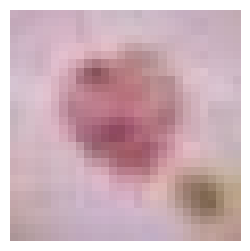

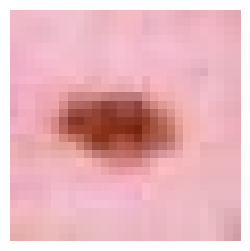

In [14]:

for i in range(2):
    color_image = np.stack([x[i][:, :, 0], x[i][:, :, 1], x[i][:, :, 2]], axis=-1)
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()


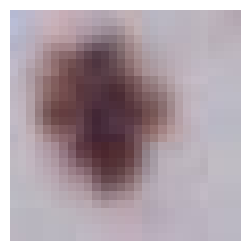

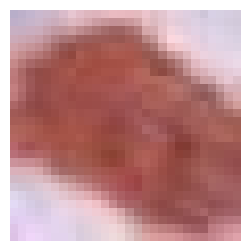

In [15]:

for i in range(2):
    color_image = np.stack(
        [x_project[i][:, :, 0], x_project[i][:, :, 1], x_project[i][:, :, 2]], axis=-1
    )
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()


In [16]:
dataset = tf.data.Dataset.from_tensor_slices((x, y))
x=tf.keras.applications.mobilenet_v2.preprocess_input(x)
x_project=tf.keras.applications.mobilenet_v2.preprocess_input(x_project)

In [17]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(28, 28, 3))




ValueError: Input size must be at least 32x32; Received: input_shape=(28, 28, 3)

In [ ]:
classification_model = base_model.output
classification_model = tf.keras.layers.Flatten()(classification_model)
classification_model = tf.keras.layers.Dense(512, activation='relu')(classification_model)
classification_model = tf.keras.layers.Dense(256, activation='relu')(classification_model)
classification_model = tf.keras.layers.Dense(128, activation='relu')(classification_model)
classification_model = tf.keras.layers.Dense(2, activation='softmax')(classification_model)

model=tf.keras.Model(inputs=base_model.input, outputs=classification_model)

In [ ]:
for layers in model.layers[:-5]:
    layers.trainable = False

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x[:5000], y, epochs=10, batch_size=32, validation_data=x[5000:])